In [1]:
# LB1
import datetime

import numpy as np
import pandas_datareader.data as web
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# IP1
start = datetime.date.today() - datetime.timedelta(days=5 * 365)
end = datetime.date.today()
# start = datetime.date(2017, 1, 23)
# end = datetime.date(2022, 1, 20)
df = web.DataReader(["sp500", "NASDAQCOM", "CBBTCUSD"], "fred", start, end)

In [3]:
# IP2: Drop null, calculate log return, remove unused columns
df = df.dropna()
df["SP500"] = np.log(df.sp500) - np.log(df.sp500.shift(1))
df["NASDAQ"] = np.log(df.NASDAQCOM) - np.log(df.NASDAQCOM.shift(1))
df["Bitcoin"] = np.log(df.CBBTCUSD) - np.log(df.CBBTCUSD.shift(1))
df = df.iloc[1:, 3:]

In [4]:
# IP3: Calculate standard Deviation
df.std()

SP500      0.013770
NASDAQ     0.016290
Bitcoin    0.045028
dtype: float64

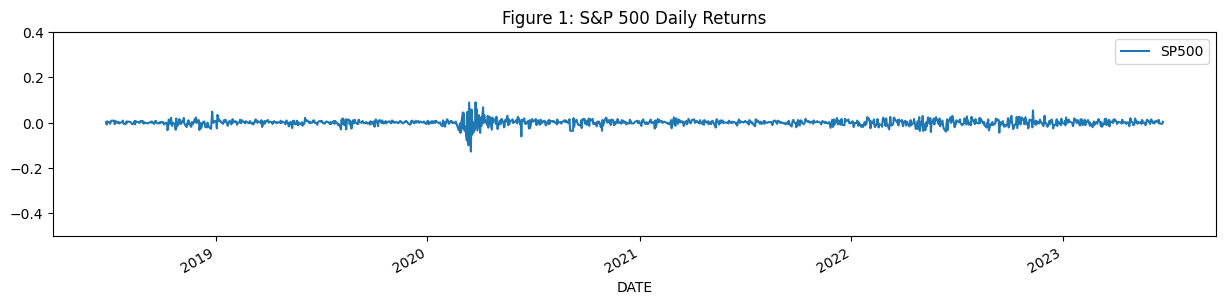

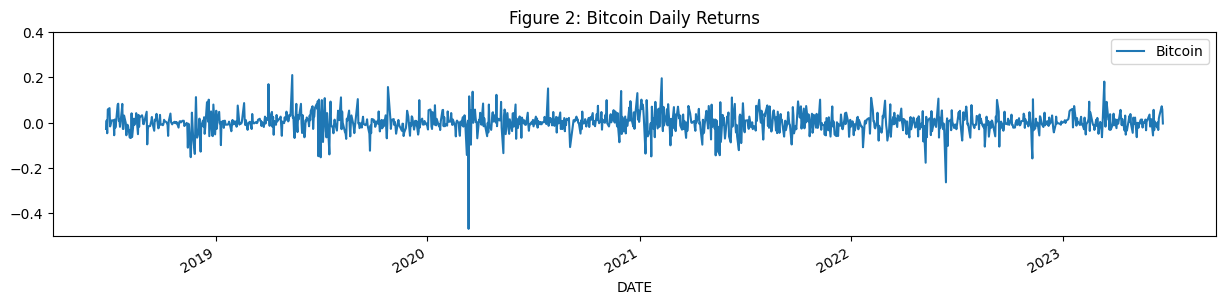

In [6]:
# IP4: Plot returns of assets
ax1 = df.plot(figsize=(15, 3), y="SP500", title="Figure 1: S&P 500 Daily Returns")
ax2 = df.plot(figsize=(15, 3), y="Bitcoin", title="Figure 2: Bitcoin Daily Returns")

ax1.set_ylim(-0.5, 0.4)
ax2.set_ylim(-0.5, 0.4);

In [7]:
# IP5: Covariance Matrix
df.cov()

,SP500,NASDAQ,Bitcoin
SP500,0.000190,0.000213,0.000187
NASDAQ,0.000213,0.000265,0.000237
Bitcoin,0.000187,0.000237,0.002027


In [8]:
# IP6: Pearson Correlation Coeffcient Matrix
round(df.corr(), 3)

,SP500,NASDAQ,Bitcoin
SP500,1.000,0.949,0.301
NASDAQ,0.949,1.000,0.324
Bitcoin,0.301,0.324,1.000


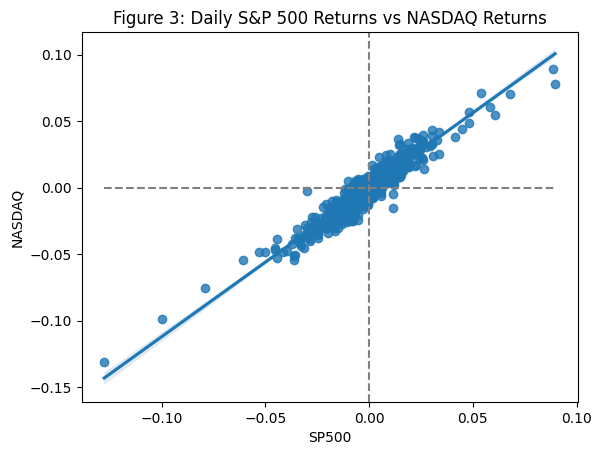

In [9]:
# IP7: Charting correlation return between tickers (1)
chart = sns.regplot(x="SP500", y="NASDAQ", data=df).set(
    title="Figure 3: Daily S&P 500 Returns vs NASDAQ Returns"
)

plt.axvline(0, 0, 1, dash_capstyle="butt", linestyle="--", color="grey")
plt.plot([min(df.SP500), max(df.SP500)], [0, 0], linestyle="--", color="grey");

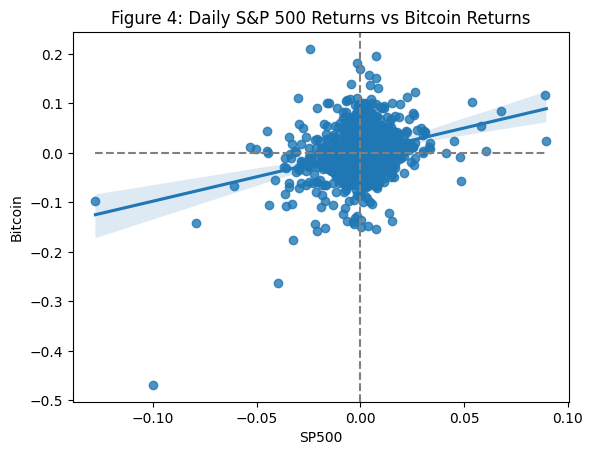

In [11]:
# IP7: Charting correlation return between tickers (2)
sns.regplot(x="SP500", y="Bitcoin", data=df).set(
    title="Figure 4: Daily S&P 500 Returns vs Bitcoin Returns"
)

plt.axvline(0, 0, 1, dash_capstyle="butt", linestyle="--", color="grey")
plt.plot([min(df.SP500), max(df.SP500)], [0, 0], linestyle="--", color="grey");

In [12]:
# IP8: Calculating Sharpe Ratio (1)
Sharpe_Ratio_SP500 = df["SP500"].mean() / df["SP500"].std()
Sharpe_Ratio_SP500

0.027656291280672155

In [13]:
# IP8: Calculating Sharpe Ratio (2)
Sharpe_Ratio_Bitcoin = df["Bitcoin"].mean() / df["Bitcoin"].std()
Sharpe_Ratio_Bitcoin

0.027701939123228853

In [14]:
# IP9: Calculating Semivariance (1)
sp500mean = df["SP500"].mean()
sp500_semivariance = ((df[df["SP500"] < sp500mean]["SP500"] - sp500mean) ** 2).mean()
sp500_semivariance

0.00021844345518002518

In [ ]:
# IP9: Calculating Semivariance (2)
BTCmean = df["Bitcoin"].mean()
BTC_semivariance = ((df[df["Bitcoin"] < BTCmean]["Bitcoin"] - BTCmean) ** 2).mean()
BTC_semivariance